# PART I: Random Walks and approximation of a Brownian Motion
How do we model something that is random, a stochastic process?

In [1]:
import math
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

## Random Walk
I will develop and code a symmetric Random Walk which is basically the Discrete time version of a Brownian Motion. I am going to use Steven Shreve's examples from Stochastic Calclulus for Finance parts I and II ( Classics !).

### Simple Symmetric Random Walk
Imagine we toss a coin and every time it comes heads, we move 1 up, every time it comes tails, we move one down. This can be written as:
Picture you have successive coin tosses, $\omega = \omega_1\omega_2\omega_3 $...

Where $\omega_n $ is the outcome of the nth toss.

Let $X(j) = 1$ if outcome = H and -1 if outcome = T

If we define M(0) = 0, then we have a process $M(k) = \sum\limits_{j=1}^{k}X_{j}$.

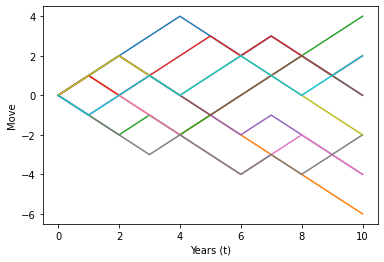

In [2]:
# Parameters
M = 10 # number of simulations
t = 10 # Time

random_walk = [-1, 1]
steps = np.random.choice(random_walk, size=(M,t)).T
origin = np.zeros((1,M))
rw_paths = np.concatenate([origin, steps]).cumsum(axis=0)

plt.plot(rw_paths)
plt.xlabel("Years (t)")
plt.ylabel("Move")
plt.show()

In [3]:
np.var(rw_paths,axis=0)

array([1.53719008, 4.44628099, 3.65289256, 0.97520661, 3.05785124,
       0.7768595 , 1.90082645, 1.33884298, 1.33884298, 0.7768595 ])

In the graph above, we can see 10 randomly simulated walks for 10 years. Remember these are symmetric which plays a very important role later. The properties we are interested in are:

1. Independent Increments
- $ 0 = k_{0} < k_{1} < ..... < k_{m}$
- $ M_{k1} = (M_{k1} - M_{k0}), (M_{k2} - M_{k1}),.....(M_{km},M_{km-1})$
- $ E[M_{ki+1} - M_{ki}] = 0$
- $ Var(M_{ki+1} - M_{ki}) = k_{i+1}-k_{i}$
- $ Variance accumulates at rate one per unit time

2. Martingale
- Conditional Expectation of next value in sequence is current price
- 0 < k < l < T
- $ E[...|F_{k}] = E[(M_{l}-M_{k})+M_{k}|F_{f}]
                 = E[M_{l}-M_{k}|F_{k}] + E[M_{k}|F_{k}]
                 = E[M_{l}-M_{k}|F_{k}] + M_{k}
                 = M_{k}$

3. Quadratic Variation
- Computed Path-by-Path, one increment at a time
- $ [M,M]_{k} = \sum\limits_{j=1}^{k}(M_{j} - M_{j-1})^{2} = k$

Note: Importance of Quadratic Variation, generalized to Itô processes that can be expressed in terms of Itô integrals.

${\displaystyle {\begin{aligned}X_{t}&=X_{0}+\int _{0}^{t}\sigma _{s}\,dB_{s}+\int _{0}^{t}\mu _{s}\,d[B]_{s}\\&=X_{0}+\int _{0}^{t}\sigma _{s}\,dB_{s}+\int _{0}^{t}\mu _{s}\,ds,\end{aligned}}}$

Where B is a Brownian motion. Any such process has quadratic variation given by:

$[X]_{t}=\int _{0}^{t}\sigma _{s}^{2}\,ds.$

In [4]:
# Create Quadratic variation and Variance functions 
# Quadratic Variation is unique to S
quadratic_variation = lambda x: round(np.square(x[:-1]-x[1:]).sum(),3)
variance = lambda x: round(np.var(x,axis=0),3)

[quadratic_variation(path) for path in rw_paths.T[:4]]
# Quadratic variation is the actual time we are stepping ahead!

[10.0, 10.0, 10.0, 10.0]

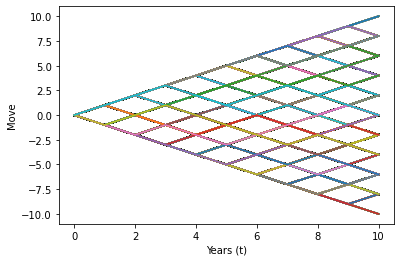

In [5]:
# Parameters
M = 50000 # number of simulations
t = 10 # Time

random_walk = [-1, 1]
steps = np.random.choice(random_walk, size=(M,t)).T
origin = np.zeros((1,M))
rw_paths = np.concatenate([origin, steps]).cumsum(axis=0)

plt.plot(rw_paths)
plt.xlabel("Years (t)")
plt.ylabel("Move")
plt.show()

In [6]:
[variance(path) for path in rw_paths[1:11]]
# Variance dependent(and actually equal) to the time step we are at: Do a lot of simulations to test this(I test with 50000)

[1.0, 2.008, 2.97, 3.954, 4.951, 5.943, 6.935, 7.907, 8.905, 9.919]

### Scaled Symmetric Random Walk
By scaling the above, we can approxiate a Brownian Motion which is of course stochastic for continuous variables

$W^{n}(t) = \frac{1}{\sqrt(n)} M_{nt}$

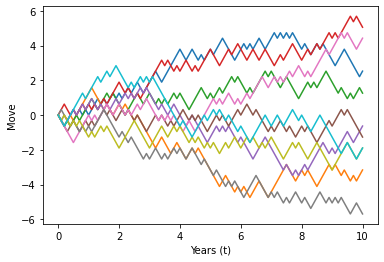

In [7]:
# Parameters
M = 10 # number of simulations
t = 10 # Time
n = 10

random_walk = [-1, 1]
steps = (1/np.sqrt(n)) * np.random.choice(random_walk, size=(M,t*n)).T
origin = np.zeros((1,M))
srw_paths = np.concatenate([origin, steps]).cumsum(axis=0)

time = np.linspace(0,t,t*n+1)
tt = np.full(shape=(M, t*n+1), fill_value=time)
tt = tt.T
# print(np.size(tt),np.size(srw_paths))
plt.plot(tt,srw_paths)
plt.xlabel("Years (t)")
plt.ylabel("Move")
plt.show()

Notice how by scaling, we still have 10 periods, 10 walks simulated however we have 10 'increments' between each period which lead to this outcome.Let's increase them some more to see what happens.

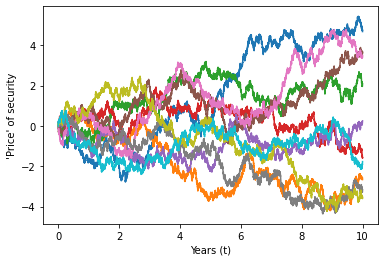

In [8]:
# Parameters
M = 10 # number of simulations
t = 10 # Time
n = 1000

random_walk = [-1, 1]
steps = (1/np.sqrt(n)) * np.random.choice(random_walk, size=(M,t*n)).T
origin = np.zeros((1,M))
srw_paths = np.concatenate([origin, steps]).cumsum(axis=0)

time = np.linspace(0,t,t*n+1)
tt = np.full(shape=(M, t*n+1), fill_value=time)
tt = tt.T
# print(np.size(tt),np.size(srw_paths))
plt.plot(tt,srw_paths)
plt.xlabel("Years (t)")
plt.ylabel(" 'Price' of security ")
plt.show()

A bit heavier on calculations, however they now tend to look more like a Brownian motion. Almost like stock prices!

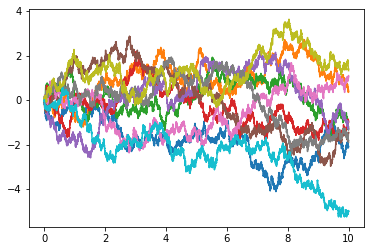

In [9]:

M = 10 # Simulations
t = 10 # Time
n = 1000 # insert independent increments

random_walk = [1,-1]
steps = 1/np.sqrt(n)*np.random.choice(random_walk,size=(M,t*n)).T # Normalize !
origin = np.zeros((1,M))
process = np.concatenate([origin,steps]).cumsum(axis=0)

time = np.linspace(0,t,t*n+1)
tt = np.full(shape=(M, t*n+1), fill_value=time)
tt = tt.T
# print(np.size(tt),np.size(srw_paths))
plt.plot(tt,process)
plt.show()

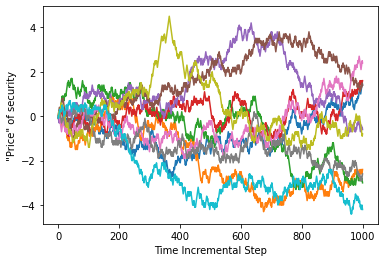

In [10]:
# Brownian approximation using discrete time steps random walks!

S = 10 # Simulations
t = 10 # Time horizon
n = 100 # increments

random_walk = [1,-1] # Pick 1 of either up(+1) or down(-1)
origin = np.zeros((1,S)) # Set up initial starting points
steps = (1/np.sqrt(n)) * np.random.choice(random_walk,size=(M,t*n)).T # Normalize and return a vector
path = np.concatenate([origin,steps]).cumsum(axis=0)

# Prepare to plot, we have to create a time variable!
plt.plot(path)
plt.xlabel('Time Incremental Step')
plt.ylabel(' "Price" of security ')
plt.show()

### Law of iterated logarithm for Brownian motion
Take a look at the graph below where we simulate 1000 random walks. Notice the shape , the outcomes tend to be 'bound' within a certain hyperbolic shape. For more info check out https://en.wikipedia.org/wiki/Law_of_the_iterated_logarithm

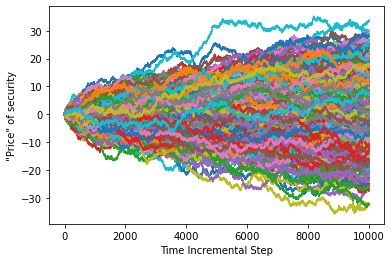

In [11]:
S = 1000 # Simulations
t = 100 # Time horizon
n = 100 # increments

random_walk = [1,-1] # Pick 1 of either up(+1) or down(-1)
origin = np.zeros(shape=(1,S)) # Set up initial starting points
steps = (1/np.sqrt(n)) * np.random.choice(random_walk,size=(S,t*n)).T # Normalize and return a vector
path = np.concatenate([origin,steps],axis=0).cumsum(axis=0)

# Prepare to plot, we have to create a time variable!
plt.plot(path)
plt.xlabel('Time Incremental Step')
plt.ylabel(' "Price" of security ')
plt.show()

This bound is given by 

$ \sqrt{2n\log\log{n}} $ where n is time (t)

The law operates between the Law of large numbers and the Central Limit Theorem

For our example above, we can see that $ \sqrt{2*t\log\log{t}} $ almost equals 30.5 which seem to be the bounds!

# PART II: Geometric Brownian Motion and Simulations

In this tutorial we will be simulating Geometric Brownian Motion in Python. Geometric Brownian motion (GBM) S is defined by S0 > 0 and the dynamics as defined in the following Stochastic Differential Equation (SDE):

$ dS_{t} = \mu S_{t} dt + \sigma S_{t} dW_{t}$

Integrated Form:

- $ logS_{t} = logS_{0} + \int^{t}_{0}(\mu-\frac{\sigma^{2}}{2})ds + \int^{t}_{0}\sigma dW_{s} $

- $ logS_{t} = logS_{0} + (\mu-\frac{\sigma^{2}}{2})t + \sigma dW_{t} $

- $ logS_{t} \sim N(logS_{0} + (\mu-\frac{\sigma^{2}}{2})t, \sigma^{2}t) $

Explicit Expression:

$S_{t} = S_{0} e^{(\mu - \frac{\sigma^{2}}{2})t + \sigma W_{t} }$

Parameters ( Coefficients ) :

$ \mu : Drift $

$ \sigma : Volatility $

##### Create a function to generate a GBM

In [12]:
# Pandas are going to help a lot here
import pandas as pd

def gbm(S0,mu,sigma,T,n=252,M=100):
    """
    Inputs:
    S0 : Starting Price of stock
    mu : Drift - average of returns annually for example
    sigma : volatility - annual again
    T : time period of simulations
    n : frequency of steps
    M : number of simulations / scenarios
    
    Outputs:
    Returns a dataframe object with the price of asset on each step for each simulation
    """
    
    # Define time step - increment
    dt = T/n
    
    # Geometric Process
    St = np.exp( (mu - sigma ** 2 / 2)*dt 
               + sigma * np.random.normal(0,np.sqrt(dt),size=(M,n)).T
               )
    
    # Include the starting point
    St = np.vstack([np.ones(M),St])
    
    # Multiply them to get each path
    St = S0 * St.cumprod(axis=0)
    
    return pd.DataFrame(St)

##### Simple example

In [13]:
S0 = 100
mu = 0.1
sigma = 0.3
T = 1

<AxesSubplot:>

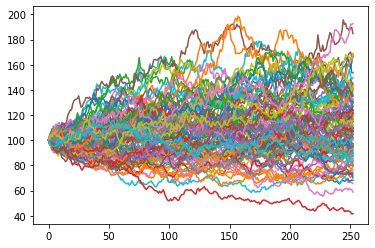

In [14]:
gbm_example = gbm(S0,mu,sigma,T)
gbm_example.plot(legend=False)
# We see 100 simulations of stock prices in a year , given their average yearly returns and volatility !

##### A real world example for Nasdaq Composite Index ( ^IXIC ticker)

In [15]:
import yfinance as yf

# Download data for the last 10 years ++
start = '2011-01-01'
end = '2021-09-19'
ticker = "^IXIC"

data = yf.download(ticker,start,end)

# Preview the dataset
data.head(6)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-12-31,2660.580078,2662.389893,2649.040039,2652.870117,2652.870117,1026600000
2011-01-03,2676.649902,2704.860107,2676.340088,2691.520020,2691.520020,1919660000
2011-01-04,2699.860107,2700.879883,2663.639893,2681.250000,2681.250000,2015440000
2011-01-05,2673.909912,2702.199951,2671.889893,2702.199951,2702.199951,2060750000
2011-01-06,2704.379883,2712.350098,2697.729980,2709.889893,2709.889893,2095490000
2011-01-07,2712.750000,2715.959961,2676.360107,2703.169922,2703.169922,1976220000


In [16]:
# Check for missing data
data.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [17]:
# Describe to get a sense of it
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2697.000000,2697.000000,2697.000000,2697.000000,2697.000000,2.697000e+03
mean,6091.199075,6126.658765,6051.535616,6092.501178,6092.501178,2.347297e+09
std,3104.340610,3123.852316,3080.739394,3104.735156,3104.735156,1.128642e+09
min,2312.679932,2397.340088,2298.889893,2335.830078,2335.830078,1.494100e+08
25%,3683.969971,3694.189941,3668.739990,3689.590088,3689.590088,1.756160e+09
50%,5079.759766,5102.350098,5054.970215,5082.930176,5082.930176,1.959950e+09
75%,7689.660156,7739.709961,7642.859863,7700.100098,7700.100098,2.327430e+09
max,15375.980469,15403.440430,15343.280273,15374.330078,15374.330078,1.110216e+10


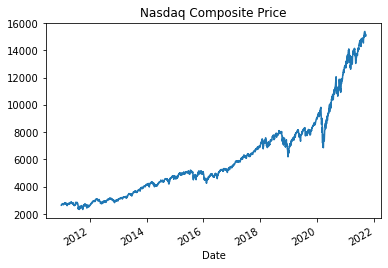

In [18]:
# Seems ok,do a quick plot of price over the last 11 years or so
data['Adj Close'].plot()
plt.title('Nasdaq Composite Price')
plt.show()

<AxesSubplot:xlabel='Date'>

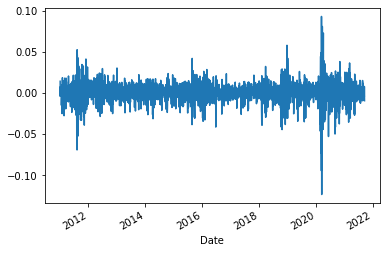

In [19]:
# Compute daily returns 
daily_rets = data['Adj Close'].pct_change() # We can also log and take the difference, both work find here

# Plot daily returns
daily_rets.plot()

In [20]:
# Find average daily returns , calculated for a year!
daily_rets.mean()*252

0.18104172105420754

In [21]:
# Another way, find yearly returns for each year, then find their average over the 11 year period!
(daily_rets.resample('Y').apply(lambda x: (x+1).prod())[1:]-1).mean()

0.18091303085485777

In [22]:
# We found mu, let's find volatility. Obviously, volatility is much harder to calculate and is not constant, however we make a simplistic assumption for now to demonstrate
daily_rets.std() * np.sqrt(252) # This is the average volatility over the 11 year period, annualized!

0.19337802129510887

##### Initialize our parameters

In [23]:
S0 = data['Adj Close'][-1] # Starting point, time 0
mu = 0.18 # Drift
vol = 0.19 # Volatility
T = 1 # Time period of 1 year ahead ( Covid-19 makes the situation much more complex obviously, again just demonstration)
# For the rest of the parameters, we go with the standards of the function

gbm_nasdaq = gbm(S0,mu,vol,T)
gbm_nasdaq.head(6)

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,15043.969727,15043.969727,15043.969727,15043.969727,15043.969727,15043.969727,15043.969727,15043.969727,15043.969727,15043.969727,...,15043.969727,15043.969727,15043.969727,15043.969727,15043.969727,15043.969727,15043.969727,15043.969727,15043.969727,15043.969727
1,15124.353024,14892.586223,15023.214636,14754.339862,15616.039533,15307.278585,15115.045971,14880.022417,15108.467111,15067.041212,...,15297.466763,15243.998998,14899.491434,14859.569730,15259.266600,15131.390727,15053.115236,14947.151330,14867.075325,15022.863803
2,15300.613873,15086.016475,14826.047797,14509.155836,15434.062259,15604.387463,15411.301303,14677.355007,15112.226035,15000.878831,...,15313.622405,15374.040199,14918.582110,14951.891766,15223.106777,14938.668057,15073.423152,15037.698599,14944.001100,15186.002192
3,14953.276698,14756.815603,14789.607606,14898.248209,15413.859910,15856.304887,15379.365955,14659.223427,15311.270481,15079.128813,...,15518.689520,15398.580344,14908.712418,14927.150097,14948.160026,14652.537648,15510.429213,15321.988370,14753.947714,15324.232418
4,14733.159460,14555.432560,14666.439450,15023.936665,15422.723483,15892.772852,15339.699026,14611.356804,15274.418773,14921.416216,...,15410.961548,15211.644030,14944.160969,14664.238313,15164.687138,14545.621248,15369.192857,15211.217803,14568.227216,15326.776087
5,14819.509943,14338.731260,14595.124442,14975.136930,15578.796510,15963.150342,15360.899364,14558.962527,15380.522589,14951.050186,...,15395.181008,15121.633476,15130.575726,14600.579350,15282.731675,14646.300409,15362.100399,15219.413382,14385.532301,15583.844817


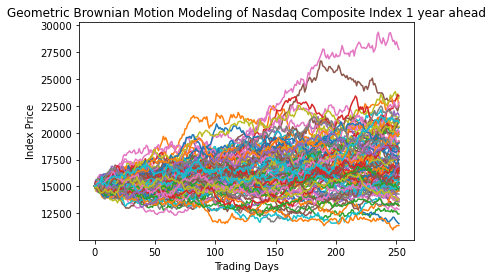

In [24]:
gbm_nasdaq.plot(legend=False)
plt.title('Geometric Brownian Motion Modeling of Nasdaq Composite Index 1 year ahead')
plt.xlabel('Trading Days')
plt.ylabel('Index Price')
plt.show()

##### The same is true for Foreign Exchange Markets, Commodities and Bonds, where it is assumed they follow a Brownian Motion. However, let's present an interesting case, Cryptocurrencies:

In [25]:
# Let's follow the same procedure for Bitcoin, it probably is the only one available to model due to data availability and robustness.
# The problems we face are many , we will not go in depth for this notebook.
btc = yf.download("BTC-USD",start,end)
btc.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [26]:
# Check for missing data

btc.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [27]:
# Describe
btc.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2554.000000,2554.000000,2554.000000,2554.000000,2554.000000,2.554000e+03
mean,8950.947609,9204.655466,8674.552085,8968.525065,8968.525065,1.347191e+10
std,13173.644629,13570.950825,12718.723071,13193.505865,13193.505865,1.984197e+10
min,176.897003,211.731003,171.509995,178.102997,178.102997,5.914570e+06
25%,574.709000,579.583221,569.800491,574.993500,574.993500,7.284393e+07
50%,5261.613525,5361.591064,5168.351074,5273.819580,5273.819580,4.381392e+09
75%,9580.411377,9748.477051,9374.281494,9580.461670,9580.461670,2.124832e+10
max,63523.753906,64863.097656,62208.964844,63503.457031,63503.457031,3.509679e+11


<AxesSubplot:xlabel='Date'>

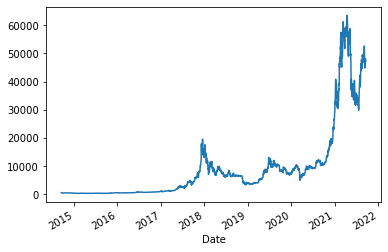

In [28]:
# Plot the adj close price
btc['Adj Close'].plot()

<AxesSubplot:xlabel='Date'>

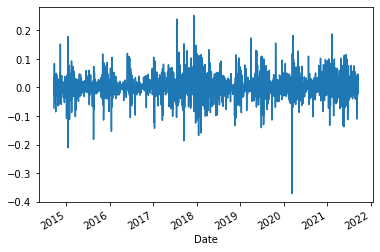

In [29]:
# Seems very different from previous Index
btc_rets = btc['Adj Close'].pct_change()

# Plot the Returns
btc_rets.plot()

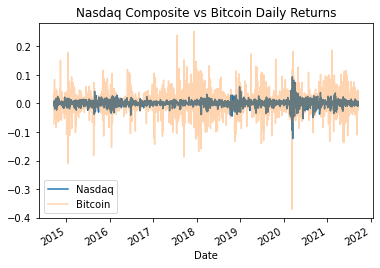

In [30]:
# Much larger daily returns, compare them to Nasdaq in the graph below
daily_rets["2014-09-17":].plot(label='Nasdaq')
btc_rets.plot(label='Bitcoin',alpha=0.32)
plt.title('Nasdaq Composite vs Bitcoin Daily Returns')
plt.legend()
plt.show()

In [31]:
# Find our parameters mu and sigma, This is where the 'uniqueness' kicks in
S0_btc = btc['Adj Close'][-1]
mu_btc = btc_rets.mean()*252 
vol_btc = btc_rets.std()*np.sqrt(252)

print(f" Mu of Bitcoin is : {np.round(mu_btc,2)} \n Volatility of Bitcoin is : {np.round(vol_btc,2)}")

 Mu of Bitcoin is : 0.65 
 Volatility of Bitcoin is : 0.62


##### Modeling Bitcoin Price with a Geometric Brownian Motion , let's see:

In [32]:
# One year ahead
T = 1

gbm_btc = gbm(S0_btc,mu_btc,vol_btc,T,n=365)
gbm_btc.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,47267.519531,47267.519531,47267.519531,47267.519531,47267.519531,47267.519531,47267.519531,47267.519531,47267.519531,47267.519531,...,47267.519531,47267.519531,47267.519531,47267.519531,47267.519531,47267.519531,47267.519531,47267.519531,47267.519531,47267.519531
1,46315.430325,47653.413761,44778.344504,46015.846671,48795.127428,48803.306324,48298.169924,47779.335126,47135.099135,44465.202062,...,47589.310437,47854.578378,48964.268924,50753.543846,47067.303868,43838.745709,45648.389901,46337.400645,47770.961761,46857.918403
2,44527.058299,50121.976391,43854.355814,46132.345535,49830.751005,47580.767801,50129.095564,45511.724327,47729.877217,44172.638679,...,48394.113671,49110.005363,50977.104752,51024.303226,48061.658798,42360.812465,45660.227698,47726.570523,46053.549921,45496.091040
3,44912.049431,49358.761384,41762.467646,44161.752812,48685.191382,46909.027547,48633.769632,45896.372000,47922.931961,46453.945752,...,49780.745513,49719.473304,51960.880524,50473.591301,46732.150090,38872.973343,46308.305352,50666.375427,47471.863781,45952.341311
4,43898.566773,50873.844927,42063.967072,44082.135670,50682.800068,46163.036666,52072.076493,45819.024684,46023.859845,50240.316076,...,48751.190174,49016.365217,54975.467902,50757.740872,44536.882255,37989.067940,45685.274096,50135.397501,47871.360611,48056.529956


<AxesSubplot:>

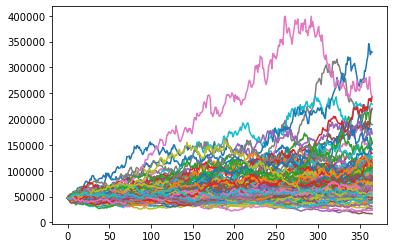

In [33]:
gbm_btc.plot(legend = False)

Notice how there are scenarios where Bitcoin price could even reach half a million dollars within a year!
What is the lowest price we get from our scenarios? Also let's show a histogram of the Prices in 1 year!

In [34]:
lowest_1y = gbm_btc.iloc[-1,:].min() # Lowest price in 1 year time
print(f"The lowest price Bitcoin reached in our scenarios is: {np.round(lowest_1y,2)} $ ")

highest_1y = gbm_btc.iloc[-1,:].max() # Highest price in 1 year time
print(f"The highest price Bitcoin reached in our scenarios is: {np.round(highest_1y,2)} $ ")

The lowest price Bitcoin reached in our scenarios is: 16535.35 $ 
The highest price Bitcoin reached in our scenarios is: 329249.85 $ 


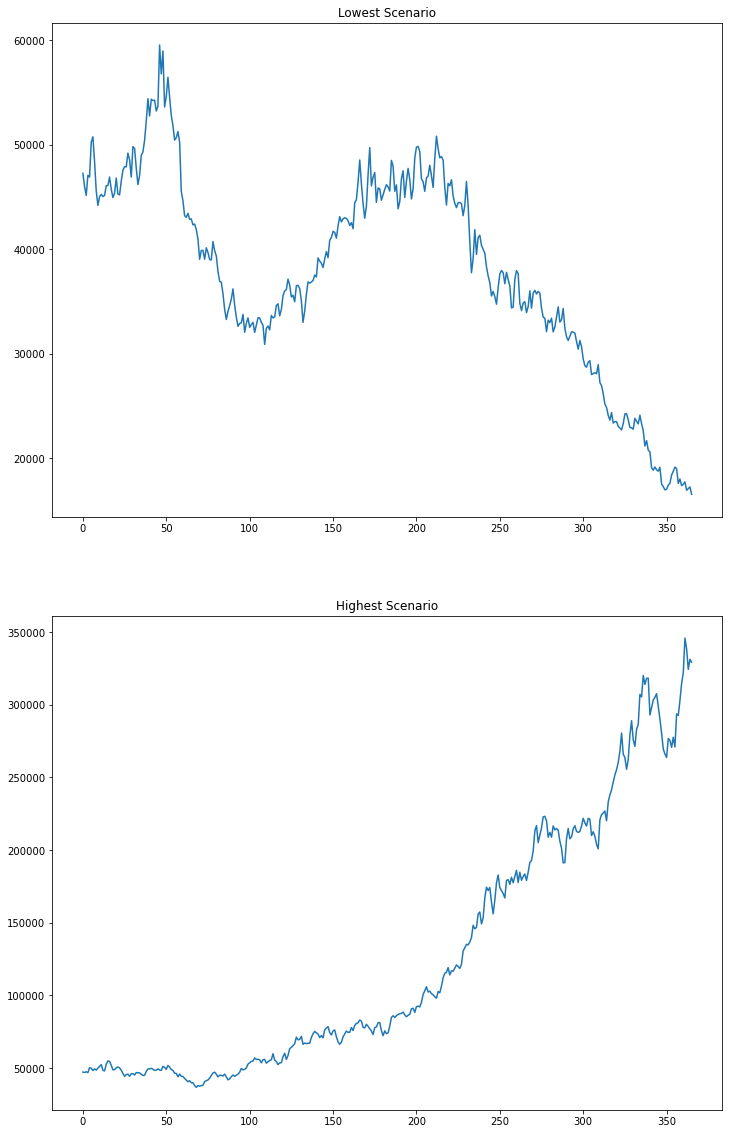

In [35]:
# Let's plot those two scenarios side by side:
fig, ax = plt.subplots(2,1,figsize=(12,20))
ax[0].plot(gbm_btc[gbm_btc.iloc[-1,:].idxmin()])
ax[0].set_title('Lowest Scenario')
ax[1].plot(gbm_btc[gbm_btc.iloc[-1,:].idxmax()])
ax[1].set_title('Highest Scenario')
plt.show()

Histogram of final values according to simulations:

The mean price of Bitcoin in a year from now is :91950.54 $ 


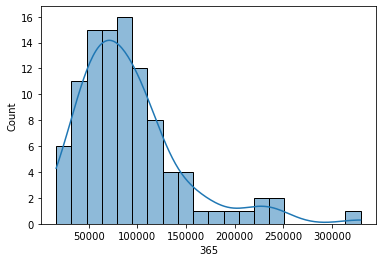

In [36]:
import seaborn as sns

sns.histplot(x=gbm_btc.iloc[-1,:],bins=20,kde=True)

# Notice how most simulations( more than half ) end up with a value less than 100.000 dollars and 4 simulations out of 100 end up with 300000 or more
# This all sounds very bullish for Bitcoin however, this is far from reality.
# It is an interesting case which provides food for thought
# Before we close this notebook, as you are probably wondering, what is the mean price of Bitcoin in 1year from our simulations?
print(f'The mean price of Bitcoin in a year from now is :{np.round(gbm_btc.iloc[-1,:].mean(),2)} $ ')

##### 1 million simulations

In [37]:
gbm_btc = gbm(S0_btc,mu_btc,vol_btc,T,n=365,M=1000000)
gbm_btc.head()

,0,1,2,3,4,5,6,7,8,9,...,999990,999991,999992,999993,999994,999995,999996,999997,999998,999999
0,47267.519531,47267.519531,47267.519531,47267.519531,47267.519531,47267.519531,47267.519531,47267.519531,47267.519531,47267.519531,...,47267.519531,47267.519531,47267.519531,47267.519531,47267.519531,47267.519531,47267.519531,47267.519531,47267.519531,47267.519531
1,46811.050619,47099.868846,46158.939552,47429.646691,50052.750929,49310.349944,45877.676939,46584.180734,47580.352251,47561.991694,...,47329.053035,51236.644032,46328.848863,48032.901180,46786.507428,47442.820204,45805.468991,47910.053246,47202.544459,47049.261569
2,48369.106620,47105.157438,43964.677160,46514.008036,52933.049675,49301.510792,45349.025095,45018.300967,48141.838710,45049.171264,...,46294.485248,51843.375026,46301.156388,48004.258945,47840.858912,45322.411246,46702.521088,48688.851107,47946.277146,45801.253116
3,49847.747076,47015.970695,46696.019469,47249.269612,51138.071835,49361.272751,46035.151770,42943.832301,48157.971968,43884.835798,...,48032.324372,52841.441808,45113.205938,49429.537929,48327.874437,45850.514656,46845.028502,46216.991859,51513.014284,43602.273200
4,50373.033101,51135.704960,48227.127244,45300.362360,52047.337181,49024.119053,47719.333004,40750.615565,49201.977759,43637.081651,...,44923.293086,53428.114620,46619.409248,51612.251122,49424.483779,44673.874874,48786.245749,45293.903136,52508.288547,39448.845892


In [38]:
gbm_btc.iloc[-1,:].min() # Min price

4550.909153053734

In [39]:
gbm_btc.iloc[-1,:].max() # Max price

1705362.9803053641

<AxesSubplot:xlabel='365', ylabel='Count'>

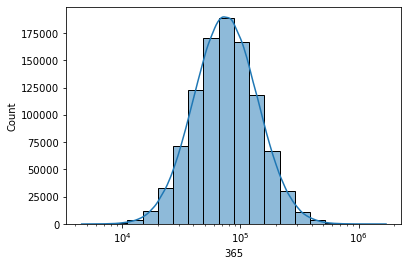

In [40]:
sns.histplot(x=gbm_btc.iloc[-1,:],bins=20,kde=True,log_scale=True)

## This is not an investment guide nor does it provide any advice. All investments are exposed to risks and capital can be lost , especially Cryptocurrencies which are not regulated and showcase extreme volatility. 
## The notebook explores the idea of Brownian Motion and it's application and reasoning behind it's usage to model financial assets. A theoretical modeling is also conducted for Bitcoin, purely for demonstration purposes and writer's curiosity.